# Quantum Computing with Qiskit

Qiskit is a Python framework dedicated to quantum computing. It allows to design and simulate quantum programs on classical computers. It offers the possibility to design quantum circuits using quantum gates, but also proposes a collection of algorithms and tools already designed. Quantum programs created with Qiskit can be simulated but also executed on IBM's quantum computers. 

Through this notebook, we will see the main features of the Qiskit framework: the creation of quantum circuits, the representation of qubit states, the use of quantum gates, the measurement of qubit states and the implementation of some known quantum algorithms.

## Qiskit Fundamentals

### Requirements

The following code allows us to import from the Qiskit library all the elements that will allow us to create quantum circuits and to initialize the quantum simulator, as well as adding quantum gates and implementing quantum algorithms.

In [19]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.visualization import array_to_latex
from math import sqrt, pi
sim = Aer.get_backend('aer_simulator')


### Circuit creation and Qubits

_A quantum circuit is a conceptual framework used in quantum information theory to describe quantum computation, analogous to classical circuits. It involves a series of operations including quantum gates, qubit initializations, measurements, and potentially other actions, that are performed in sequence._

In Qiskit, we use the `QuantumCircuit` object to store circuits. This object represents the list of quantum operations on our circuit and to which qubits they apply. The `QuantumCircuit(q,c)` function allows us to create circuits and takes as parameters the number of qubits used by our circuit and the number of classical bits.

We have seen that the state of a single qubit can be described by a two-dimensional column vector of unit norm. This also applies to Qiskit and the state of the qubits, although starting as $|0\rangle$, can be initialized using the `inititialize(state, qubit)` function which transform them into any state by specifying the target qubit and a vector describing the desired state.

Below is an example in which we create a 2 qubit quantum circuit and initialize the first qubit as $|q_0\rangle = |1\rangle$ and second qubit as $|q_1\rangle = \frac{1}{1} \times |0\rangle + \frac{\sqrt{3}}{2} \times |1\rangle$

In [20]:
# Creates a quantum circuit (2 qubits)
qc = QuantumCircuit(2)
# Apply initialisation operation
qc.initialize([0, 1], 0)
qc.initialize([1/2, sqrt(3)/2], 1)

### Measurement of a qubit

A measurement corresponds to the informal idea of ”observation” of the qubit, which immediately reduces the quantum state to one of the two classical states $[1, 0]$ and $[0, 1]$. When a qubit given by the quantum state vector $[\alpha, \beta]$ is measured, we obtain the result $0$ with probability $|\alpha|^2$ and the result 1 with probability $|\beta|^2$.

The act of measuring qubits _changes_ the state of our qubits. We sometimes refer to this as _collapsing_ the state of the qubit: depending of the measure result, the new state of the qubit is $|0\rangle$ or $|1\rangle$. Thus, we often measure the state of the qubits at the end of the execution of a quantum program.

Qiskit allows to easily measure the state of all the qubits of a circuit with the "measure all" function. It is then possible to plot the results.

Below is an example of measuring the state of the qubits on the previous circuit. The first qubit is always measured as $|1\rangle$ since it was initialized that way, and we should obtain those results for the second qubit:

\begin{gather*}
    p_{01} = |\frac{1}{2}|^2 = 0.25\\
    p_{11} = |\frac{\sqrt{3}}{2}|^2 = 0.75
\end{gather*}

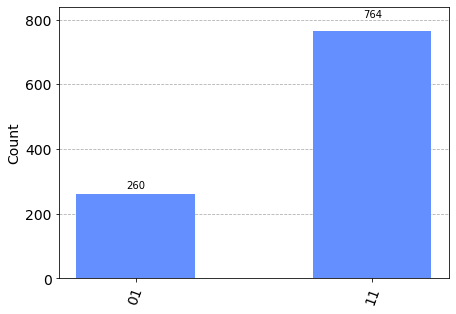

In [21]:
# Add measurements to all qubits
qc.measure_all()
# Plot results
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

Measurements with Qiskit are made on the Z-basis, where we obtain the probabiblity of measurements of states made of linear combinations of $|0\rangle$ and $|1\rangle$. We will see later that the measurements can be made on other basis thanks to quantum gates.

### Multiple Qubits and Entanglement

Single qubits are interesting, but individually they offer no computational advantage. In the first part on circuit creation, we saw that it was possible to specify the number of qubits we wanted for our circuit. The advantages of quantum computing lie in the fact that several qubits can be used and that they can interact with each other. These interactions between qubits are performed with multiple qubit quantum gates or controlled quantum gates. We will see later how to add these gates to our circuit. In the meantime, it is important to remember how multiple qubit circuits work. The state of a single qubit has two complex amplitudes and can be expressed as a linear combination of $|0\rangle$ and $|1\rangle$. In the same way, the state of 2 qubits will be described by 4 complex amplitudes:
\begin{equation*}
    |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = [a_{00}, a_{01}, a_{10}, a_{11}]
\end{equation*}
Remember that the state measurement rules for qubits are similar with multiple qubits and that:
\begin{gather*}
    p(|00\rangle) = |a_{00}|^2\\
    |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1
\end{gather*}

Some states, called **entangled**, are special and have interesting properties. Let's take for example the state $\frac{1}{2}(|00\rangle + |11\rangle)$ for a 2-qubit circuit. This state is known as the _bell state_ and can only be measured as $|00\rangle$ or $|11\rangle$ although the state of two qubits is described by 4 basis states. A characteristic of this state is that it cannot be measured as $|01\rangle$ or $|10\rangle$. Therefore, if we measured the top qubit and got the state $|1\rangle$,  the collective state of our qubits changes like so: $\frac{1}{2}(|00\rangle + |11\rangle) \to |11\rangle$.

In the following example, we will see the measurement result of this state:

In [22]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0, 1)
qc.draw()
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

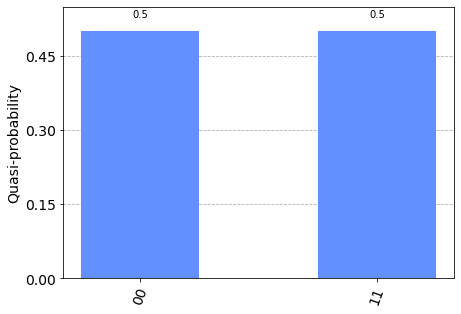

In [23]:
plot_histogram(result.get_counts())

It may not be immediately apparent how Qiskit computes the Bloch vectors for entangled qubits, given our earlier definition of the Bloch sphere. In the case of a single qubit, the location of the Bloch vector along an axis corresponds to the expected measurement outcome in that particular basis. By extending this approach to Bloch vector visualization for entangled qubits, we reach the conclusion that there is no single-qubit measurement basis that can guarantee a specific measurement outcome. This is in contrast to single-qubit states where we can always select a single-qubit basis. However, examining the qubits individually in this way ignores the crucial impact of the correlation between the qubits, making it impossible to differentiate between different entangled states.
Therefore, the states $\frac{1}{2}(|00\rangle + |11\rangle)$ and $\frac{1}{2}(|01\rangle + |10\rangle)$ will both look the same on these separate Bloch spheres, despite being very different states with different measurement outcomes.

The state we worked on previously cannot be written as two separate qubit states, this means we lose information when we try to plot our state on separate Bloch spheres:

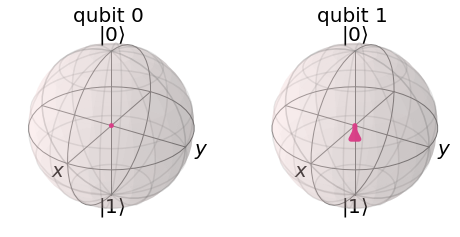

In [24]:
plot_bloch_multivector(final_state)

### Circuit visualisation

Quantum circuits created with Qiskit can be displayed directly with the `print()` function or can be rendered using `matplotlib` and the `draw()` function.

Below is an example of each of these functions with the previously created circuit:

In [25]:
print(qc)

     ┌───┐      statevector 
q_0: ┤ H ├──■────────░──────
     └───┘┌─┴─┐      ░      
q_1: ─────┤ X ├──────░──────
          └───┘      ░      


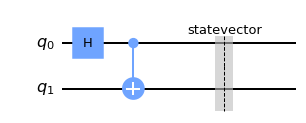

In [26]:
qc.draw(output='mpl')

### Bloch sphere

We have seen that one of the most common representations of a qubit is the Bloch sphere. It allows to visually describe the state of a qubit (a complex two-dimensional vector). Qiskit allows to visualize qubits with the Bloch sphere from a vector of complex numbers or from a quantum circuit:

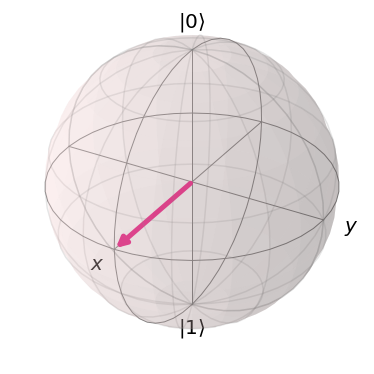

In [27]:
coords = [1, pi/2, 0]  # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical')

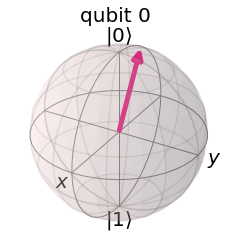

In [28]:
qc = QuantumCircuit(1)
qc.initialize([1/2, sqrt(3)/2], 0)
qc.h(0)
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)


## Quantum gates
### Single qubit gates
#### Pauli gates (X, Y, Z)

The Pauli $(X, Y, Z)$ gates are gates that act on a single qubit. The Pauli X, Y and Z equate, respectively, to a rotation around the x, y and z axes of the Bloch sphere by $\pi$ radians. The Pauli-X gate is the quantum equivalent of the NOT gate for classical computers. It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. The Pauli-Y gate maps $|0\rangle$ to $i|1\rangle$ and $|1\rangle$ to $-i|0\rangle$. Pauli-Z leaves the basis state $|0\rangle$ unchanged and maps $|1\rangle$ to $-|1\rangle$.

Each of the Pauli gates (X, Y, Z) can be used in the quantum circuits created with Qiskit. They can be easily added to a circuit using the `x()`, `y()`, and  `z()` functions and specifying the target qubit as a parameter.

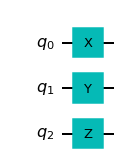

In [29]:
# The Pauli gates (X, Y, Z)
qc = QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)
qc.draw(output='mpl')

#### Hadamard Gate

The Hadamard (H-gate) is a fundamental quantum gate which operates on a single qubit. It maps the basis states $|0\rangle \mapsto \frac{|0\rangle + |1\rangle}{\sqrt{2}}$ and $|1\rangle \mapsto \frac{|0\rangle - |1\rangle}{\sqrt{2}}$.

Its use in Qiskit is as simple as the Pauli gates and requires the use of the `h()` function. In the following example, we will see how to measure qubits in the X-basis ($|+\rangle$ and $|-\rangle$) thanks to the Hadamard gate:

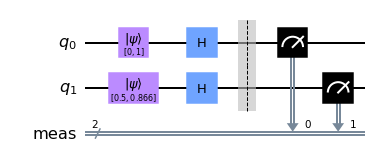

In [30]:
# The Hadamard Gate and X-basis measurements
qc = QuantumCircuit(2)
qc.initialize([0, 1], 0)
qc.initialize([1/2, sqrt(3)/2], 1)
qc.h(0)
qc.h(1)
qc.measure_all()
qc.draw(output='mpl')


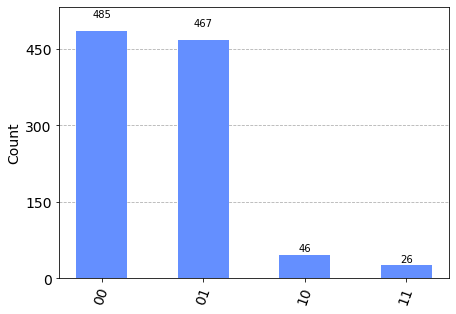

In [31]:
# Measurement results
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

_To interpret the result here, it must be understood that measuring the $10$ state means that it has been measured $|+\rangle$ on the first qubit and $|-\rangle$ on the second qubit. The above circuit is initialized as the one created to introduce the qubit state measurements but we observe a different result by adding the Hadamard gate._

### Controlled gates

Controlled gates act on 2 or more qubits, where one or more qubits act as a control for some operation.

#### CNOT gate
CNOT (or Conditional NOT, controlled Pauli-X) is a really important operation which operates on a pair of bits. One bit is designated to be the ”control” bit and the other one is the ”target” bit. It performs the NOT operation on the second qubit only when the first qubit is $|1\rangle$, and otherwise leaves it unchanged.

The CNOT gate can be described as the gate that maps the basis states $|{a, b}\rangle \mapsto |{a, a \oplus b}\rangle$ where $\oplus$ is XOR.

Below is an example in Qiskit where $0$ is the control bit and $1$ is the target bit.


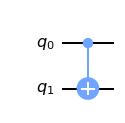

In [32]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw(output='mpl')

### Parametrised gates

Qiskit also allows us to use parametrised gates such as the gate: `p(phi, qubit)`, which performs a rotation of $\varphi$ radians around the Z-axis direction. This gate is known as the phase shift, which is part of the single-qubit gates. It maps the basis states $|0\rangle \mapsto |0\rangle$ and $|1\rangle \mapsto e^{i\varphi}|1\rangle$.

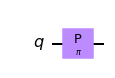

In [33]:
qc = QuantumCircuit(1)
qc.p(pi, 0)
qc.draw(output='mpl')

### Grover's Algorithm Implementation

Grover's algorithm implementation for the case of 2 qubits for $\lvert w \rangle = |11\rangle$.

In [34]:
n = 2
grover_circuit = QuantumCircuit(n)

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

grover_circuit = initialize_s(grover_circuit, [0,1])


In the case $\lvert w \rangle = \lvert 11 \rangle$, the oracle $U_\omega$ acts as follows: 

$$U_\omega | s \rangle = U_\omega \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle + |11\rangle \right) = \frac{1}{2}\left( |00\rangle + |01\rangle + |10\rangle - |11\rangle \right).$$

$$
U_\omega = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & -1 \\
\end{bmatrix}
$$

which is commonly known as the controlled-Z gate. Therefore, in this example, the controlled-Z gate serves as our oracle:

In [35]:
grover_circuit.cz(0, 1)  # Oracle

Then we need to implement the diffuser (or amplification part): $U_s = 2|s\rangle\langle s| - I$ 

We need to apply:
$$H^{\otimes n}U_0 H^{\otimes n} = U_s$$

such that
$$U_0 \frac{1}{2}\left( \lvert 00 \rangle + \lvert 01 \rangle + \lvert 10 \rangle + \lvert 11 \rangle \right) = \frac{1}{2}\left( \lvert 00 \rangle - \lvert 01 \rangle - \lvert 10 \rangle - \lvert 11 \rangle \right)$$

We obtain the following circuit:


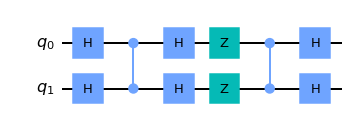

In [36]:
# Diffusion operator (U_s)
grover_circuit.h([0, 1])
grover_circuit.z([0, 1])
grover_circuit.cz(0, 1)
grover_circuit.h([0, 1])
grover_circuit.draw(output='mpl')

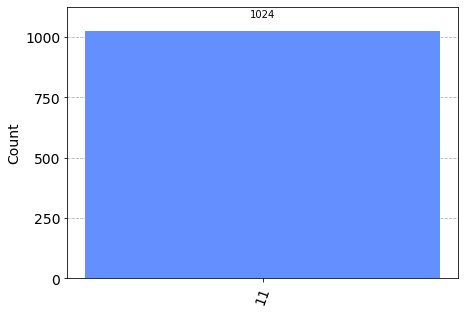

In [37]:
grover_circuit.measure_all()
qobj = assemble(grover_circuit)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)
